#### Notebook purpose
This notebooks aims to look for insights from the news articles collected via http://eventregistry.org API. Documents have been collected over the last 30 days. Please refer to [notebooks/0_extract_data.ipynb](https://github.com/qthurier/event_registry_project/notebooks/workspace/0_extract_data.ipynb) for details about the data extraction process.

We first present the insights from the articles about sports then from articles about politics. 

On one hand we look for trends in terms of entities, which can be of 2 types: people or events. They have been extracted from the articles using the off-the-shelf Named Entity Recognition model provided by the package [SpaCy](https://spacy.io/usage/linguistic-features#entity-types).

On the other hand we look for trends in terms of topics in the titles and in the articles contents. Topics have been defined using a Latent Dirichlet Allocation model with the package [gensim](https://radimrehurek.com/gensim/models/ldamodel.html). Please refer to [notebooks/1_topic_modelling.ipynb](https://github.com/qthurier/event_registry_project/notebooks/workspace/1_topic_modelling.ipynb) for details about the topic extraction process.

#### Notes on the figures
Only the most cited entites and topics in the news are displayed in the images. The ranking is calculated daily and we kept the top ones only. The vertical white lines can be used to track the most important entities and topics for each date. 

Some entities have been filtered using regular expressions before calculating this ranking. There are generally 2 situations when we use a filter: 
- False positive entities: the model provided by SpaCy wrongly reports this chunk of text as an entity (ex: twitter as a person)
- Noise entities: these entities always appear in the news regardless of the time period (ex: olympic games as an event)

The position on the vertical axis is randomized in order for the different chunks of text to be readable. Hence this axis doesn't reflect a ranking between entities or topic. Instead, the diameter of the circles, which is proportional to the number of mentions in the news, can be used to compare the importance between item of the same type (e.g. for comparing the top event on a particular date with the top event the next day). On the contrary, the color code gives a discrete measure of the importance regardless of the item type. Hence it can be used to compare the importance of 2 items of different nature e.g. a person with an event etc.

A (probably) better version of the images presented in this notebook is available under the folder /figures if needed.

#### Import data and set up parameters used in the notebook

In [1]:
import pandas as pd
from ast import literal_eval

In [3]:
data_path = '../../data/'
figures_path = '../../figures/'

In [4]:
sports_df = pd.read_csv(f'{data_path}sports_10k.csv', converters={'event_list': literal_eval, 'person_list': literal_eval})
politics_df = pd.read_csv(f'{data_path}politics_10k.csv', converters={'event_list': literal_eval, 'person_list': literal_eval})

In [5]:
sports_df_lda_body = pd.read_csv(f'{data_path}sports_body_10000_docs_20_topics_lda_weights.csv').join(sports_df[['date']])
sports_df_lda_title = pd.read_csv(f'{data_path}sports_title_10000_docs_20_topics_lda_weights.csv').join(sports_df[['date']])
politics_df_lda_body = pd.read_csv(f'{data_path}politics_body_10000_docs_20_topics_lda_weights.csv').join(politics_df[['date']])
politics_df_lda_title = pd.read_csv(f'{data_path}politics_title_10000_docs_20_topics_lda_weights.csv').join(politics_df[['date']])

In [ ]:
import matplotlib.pyplot as plt
import phq_utils.utils_plot as utils

#### Insights related to sport news

The time period starts and finishes with two relatively important events which are confirmed by the topics mentioned in the news:
- the Chicago auto show with the keywords car, speed, engine
- the international Women's day with the keyword women

From 20th to 22nd February, Georges St Pierre, an MMA fighter is the most cited person. It refers to the anoucement of his retirement. On the 20th he is equal first with another fighter, Khabib Nurmagomedov, who asked him to have a final match before he retires.

On 26th February, Alex Marshall, the International Cricket Council anti-corruption unit General Manager, is the person the most cited. This refers to an investigation regarding the former Sri Lanka captain Sanath Jayasuriya (most cited person the next day). This is confirmed by the keywords athlete, inestigation, player that show up on 26th & 27th February.

The cooccurence of the event the Six Nations with the corresponding list of keywords league, watch, live appears twice: 22nd February and 2nd March. This refers to the famous annual international rugby union competition that is happening in Europe currently.

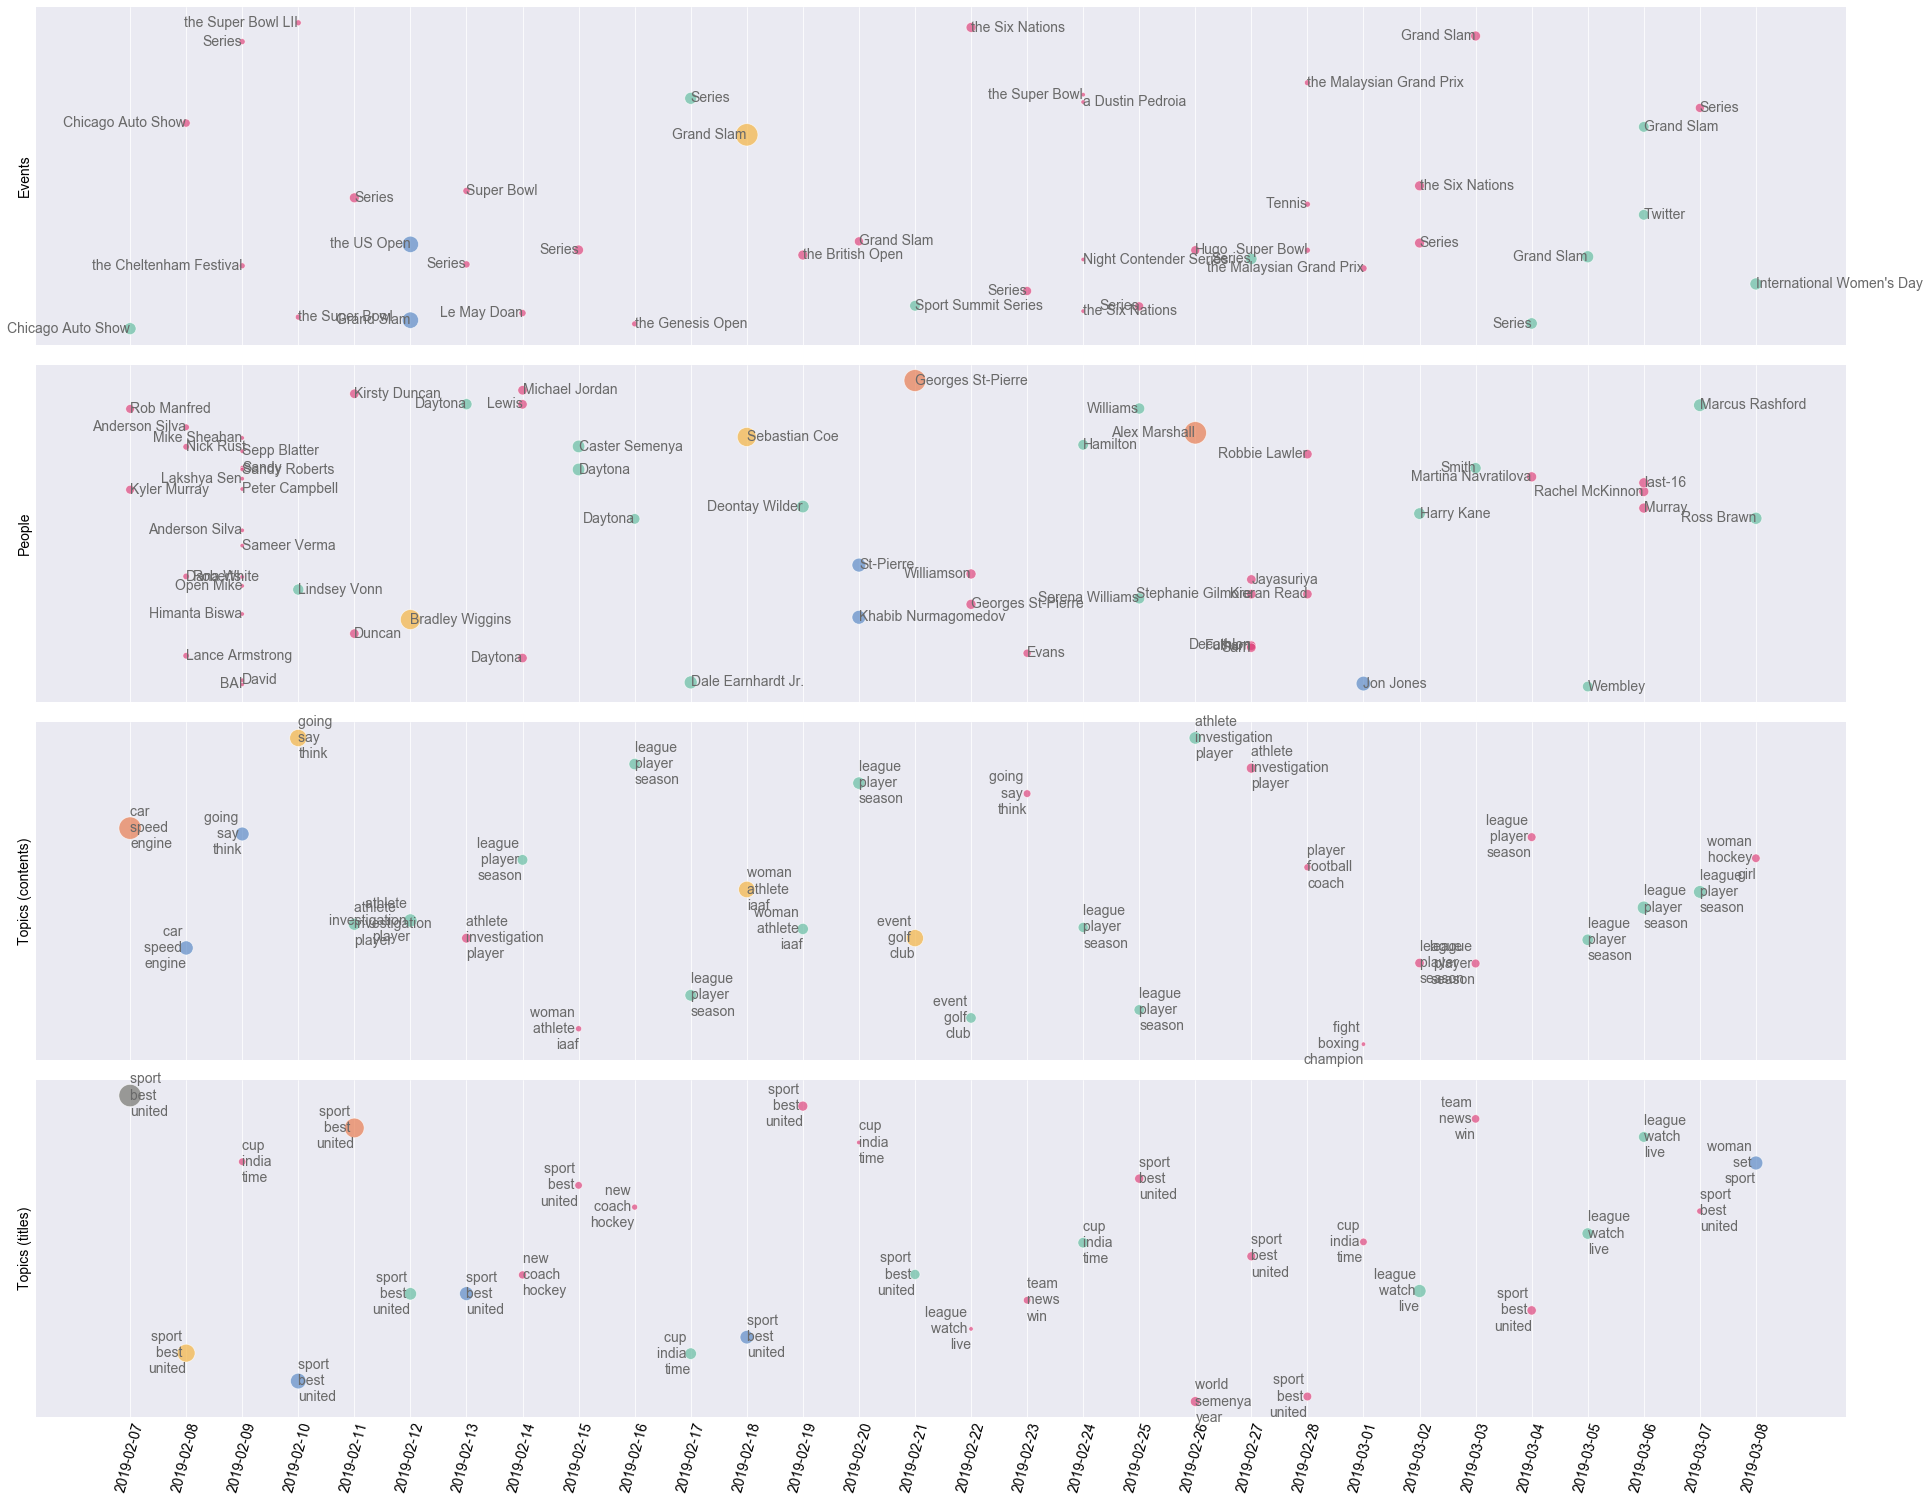

In [7]:
fig, axs = plt.subplots(4, 1, sharex=True)
plt.tight_layout(pad=-0.5, w_pad=-0.5, h_pad=-0.5)

utils.plot_important_entities_over_time(sports_df,
                                        'event_list',
                                        ['olympic', 'world', 'champion', 'game', 'cup'],
                                        1,
                                        'Events',
                                        axs[0])

utils.plot_important_entities_over_time(sports_df,
                                        'person_list',
                                        ['xt', 'ferrari', 'twitter', 'nationals', 'chelsea', 'comment', 'olympic', 'sport',
                                         'spurs', 'bayern', 'buenos aires', 'grand slam', 'oguruma', 'decathon', 'ajax',
                                         'test', 'update', 'good friday'],
                                        1,
                                        'People',
                                        axs[1])

utils.plot_important_topics_over_time(sports_df_lda_body, 1, 'Topics (contents)', axs[2])
utils.plot_important_topics_over_time(sports_df_lda_title, 1, 'Topics (titles)', axs[3])

fig.set_size_inches(26, 20)
fig.savefig(f'{figures_path}insights_sports.png', format='png', dpi=100, bbox_inches='tight')
plt.show()

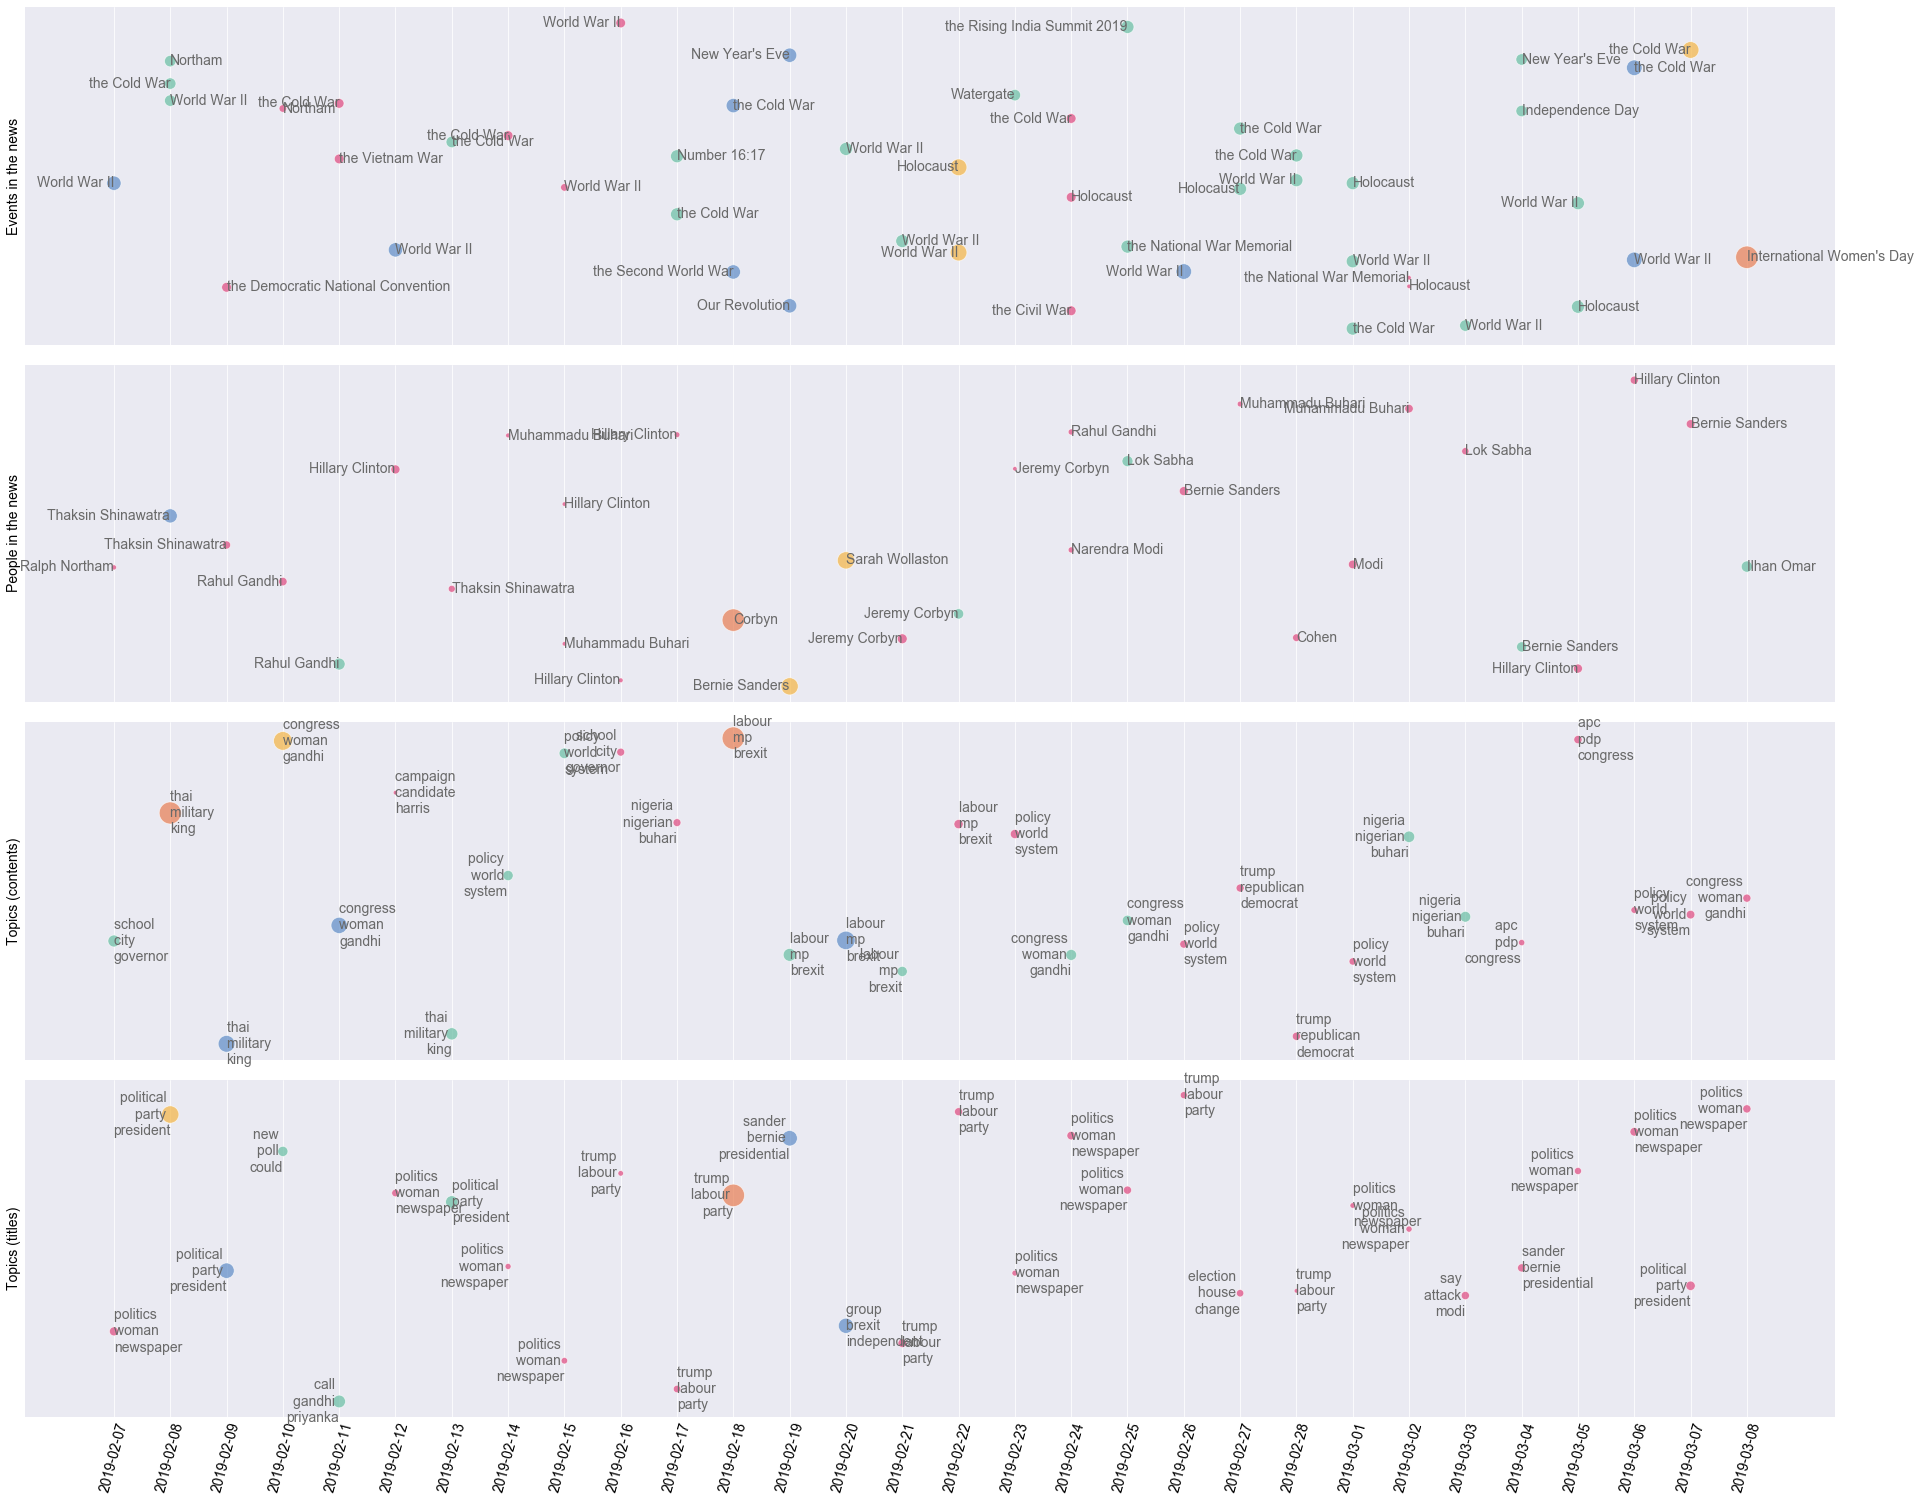

In [8]:
fig, axs = plt.subplots(4, 1, sharex=True)
plt.tight_layout(pad=-0.5, w_pad=-0.5, h_pad=-0.5)

utils.plot_important_entities_over_time(politics_df,
                                             'event_list',
                                             ['twitter', 'world cup', 'series', 'iron lady'],
                                             1,
                                             'Events in the news',
                                             axs[0])

utils.plot_important_entities_over_time(politics_df,
                                             'person_list',
                                             ['trump', 'obama'],
                                             1,
                                             'People in the news',
                                             axs[1])

utils.plot_important_topics_over_time(politics_df_lda_body, 1, 'Topics (contents)', axs[2])
utils.plot_important_topics_over_time(politics_df_lda_title, 1, 'Topics (titles)', axs[3])

fig.set_size_inches(26, 20)
fig.savefig(f'{figures_path}insights_politics.png', format='png', dpi=100, bbox_inches='tight')
plt.show()